In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmm_discretization import Discrete_Model_Optimization
from data_collection import generate_parameters, paper_experiments
from means_and_covars import means_opts, covars_opts

In [2]:
df2h_cols = ['2D with 2^6', '2D with 2^8', '3D with 2^6', '3D with 2^8', '4D with 2^6', '4D with 2^8', '6D with 2^6', '6D with 2^8','8D with 2^6', '8D with 2^8', '10D with 2^6', '10D with 2^8']
df2h_cols2 = ['Random MSE', 'Grid MSE', 'Latin Hypercube MSE', 'Sobol MSE', 'Halton MSE', 'Random KLD', 'Grid KLD', 'Latin Hypercube KLD', 'Sobol KLD', 'Halton KLD']
df2h = pd.read_csv('test_results/Results_ND_2h.csv')
df2h.pop(df2h.columns[0])
df2h = df2h.T
df2h.columns = df2h_cols
df2h_loss = df2h.iloc[list(range(0, 40, 4))]
df2h_score = df2h.iloc[list(range(1, 40, 4))]
df2h_acc = df2h.iloc[list(range(2, 40, 4))]
df2h_discr = df2h.iloc[list(range(3, 40, 4))]
dfs2h = [df2h_loss, df2h_score, df2h_acc, df2h_discr]
dfs2h_names = ['Loss', 'Score', 'Acc', 'Discrepancy']
# for df, name in zip(dfs2h, dfs2h_names):
#     df = df.round(decimals=6)
#     df = df.T
#     df.columns = df2h_cols2
#     df.to_csv(f'test_results/{name}_2h.csv')

In [3]:
df3h_cols = ['2D with 2^6', '2D with 2^8', '3D with 2^6', '3D with 2^8', '4D with 2^6', '4D with 2^8', '6D with 2^6', '6D with 2^8','8D with 2^6', '8D with 2^8', '10D with 2^6', '10D with 2^8']
df3h_cols2 = ['Random MSE', 'Grid MSE', 'Latin Hypercube MSE', 'Sobol MSE', 'Halton MSE', 'Random KLD', 'Grid KLD', 'Latin Hypercube KLD', 'Sobol KLD', 'Halton KLD']
df3h = pd.read_csv('test_results/Results_ND_3h.csv')
df3h.pop(df3h.columns[0])
df3h = df3h.T
df3h.columns = df3h_cols
df3h_loss = df3h.iloc[list(range(0, 40, 4))]
df3h_score = df3h.iloc[list(range(1, 40, 4))]
df3h_acc = df3h.iloc[list(range(2, 40, 4))]
df3h_discr = df3h.iloc[list(range(3, 40, 4))]
dfs3h = [df3h_loss, df3h_score, df3h_acc, df3h_discr]
dfs3h_names = ['Loss', 'Score', 'Acc', 'Discrepancy']
# for df, name in zip(dfs3h, dfs3h_names):
#     df.round(decimals=6)
#     df = df.T
#     df.columns = df3h_cols2
#     df.to_csv(f'test_results/{name}_3h.csv')

In [15]:
def plotting_results(metric, name, n_hidden):
    disc_methods = ['Random', 'Grid', 'LH', 'Sobol', 'Halton']
    n_dims = ['2', '3', '4', '6', '8', '10']
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 15))
    fig.suptitle(f'{name} for Discretization methods. {n_hidden} hidden states', fontsize=16)
    for c, i in enumerate(n_dims):
        axes1 = axes[c, 0].twinx()
        axes2 = axes[c, 1].twinx()
        # axes[c, 0].bar(disc_methods, metric[f'{i}D with 2^6'][:5], color='y')
        # axes[c, 1].bar(disc_methods, metric[f'{i}D with 2^8'][:5], color='y')
        if c == 5:
            axes[c, 0].plot(disc_methods, metric[f'{i}D with 2^6'][:5], color='y', marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)), label='MSE')
            axes[c, 1].plot(disc_methods, metric[f'{i}D with 2^8'][:5], color='y', marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)))
            axes1.plot(disc_methods, metric[f'{i}D with 2^6'][5:], color='b', marker='D', linestyle=(0, (1, 10)), label='KLD')
            axes2.plot(disc_methods, metric[f'{i}D with 2^8'][5:], color='b', marker='D', linestyle=(0, (1, 10)))
        else:
            axes[c, 0].plot(disc_methods, metric[f'{i}D with 2^6'][:5], color='y', marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)))
            axes[c, 1].plot(disc_methods, metric[f'{i}D with 2^8'][:5], color='y', marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)))
            axes1.plot(disc_methods, metric[f'{i}D with 2^6'][5:], color='b', marker='D', linestyle=(0, (1, 10)))
            axes2.plot(disc_methods, metric[f'{i}D with 2^8'][5:], color='b', marker='D', linestyle=(0, (1, 10)))
        axes[c, 0].set_ylabel(f'MSE {name}', c='y')
        axes[c, 1].set_ylabel(f'MSE {name}', c='y')
        axes1.set_ylabel(f'KLD {name}', c='b')
        axes2.set_ylabel(f'KLD {name}', c='b')
        axes[c, 0].set_title(f'{i} Dimensions, 2^6 Grid Size')
        axes[c, 1].set_title(f'{i} Dimensions, 2^8 Grid Size')
        axes1.set_xlabel('Discretization Method')
        axes2.set_xlabel('Discretization Method')

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    fig.legend()
    plt.show()

In [ ]:
metrics = [df2h_loss, df2h_score, df2h_acc, df2h_discr]
names = ['Loss', 'Log-Prob', 'Accuracy', 'Discrepancy']
for metric, name in zip(metrics, names):
    plotting_results(metric, name, n_hidden=2)

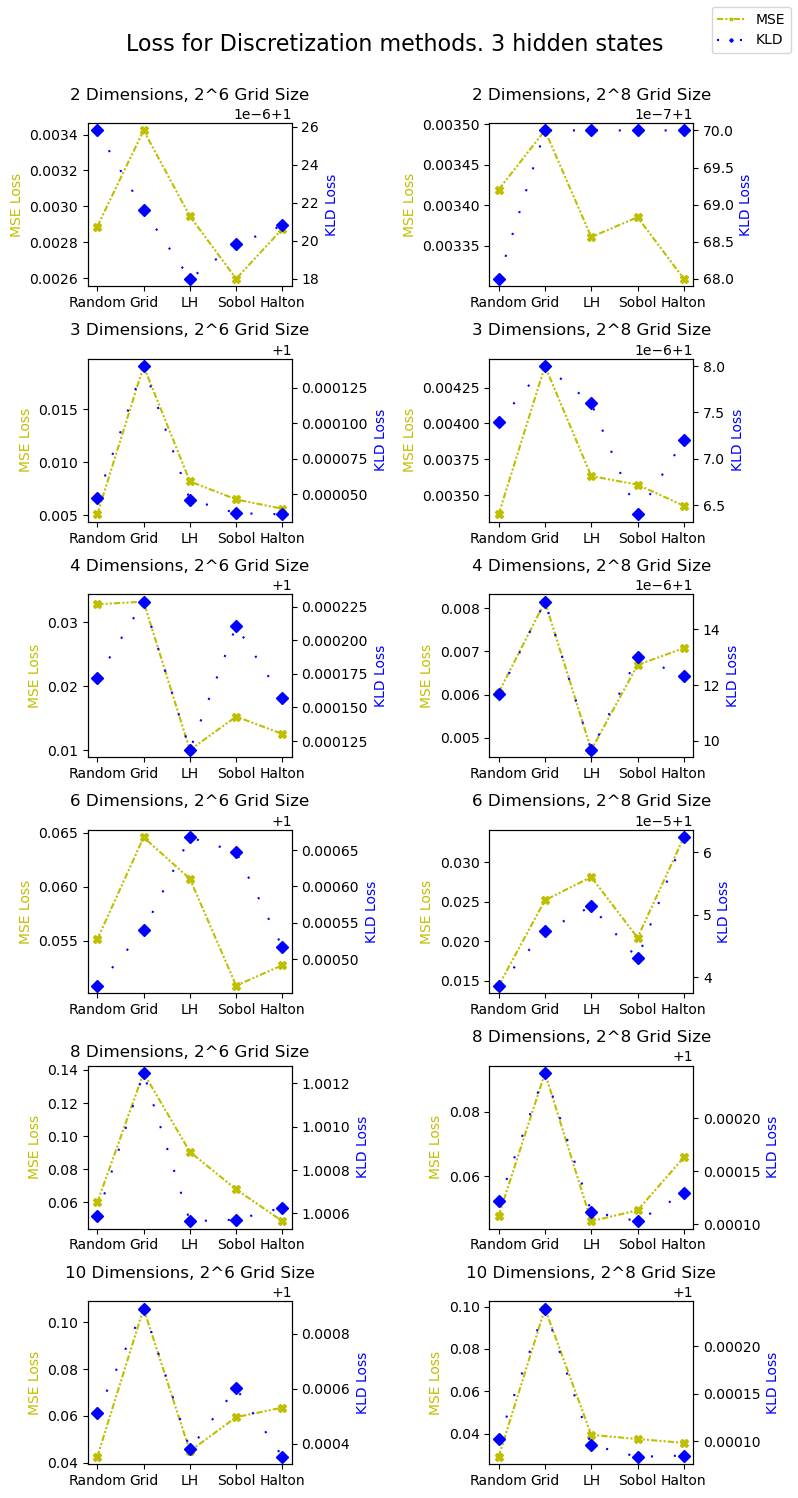

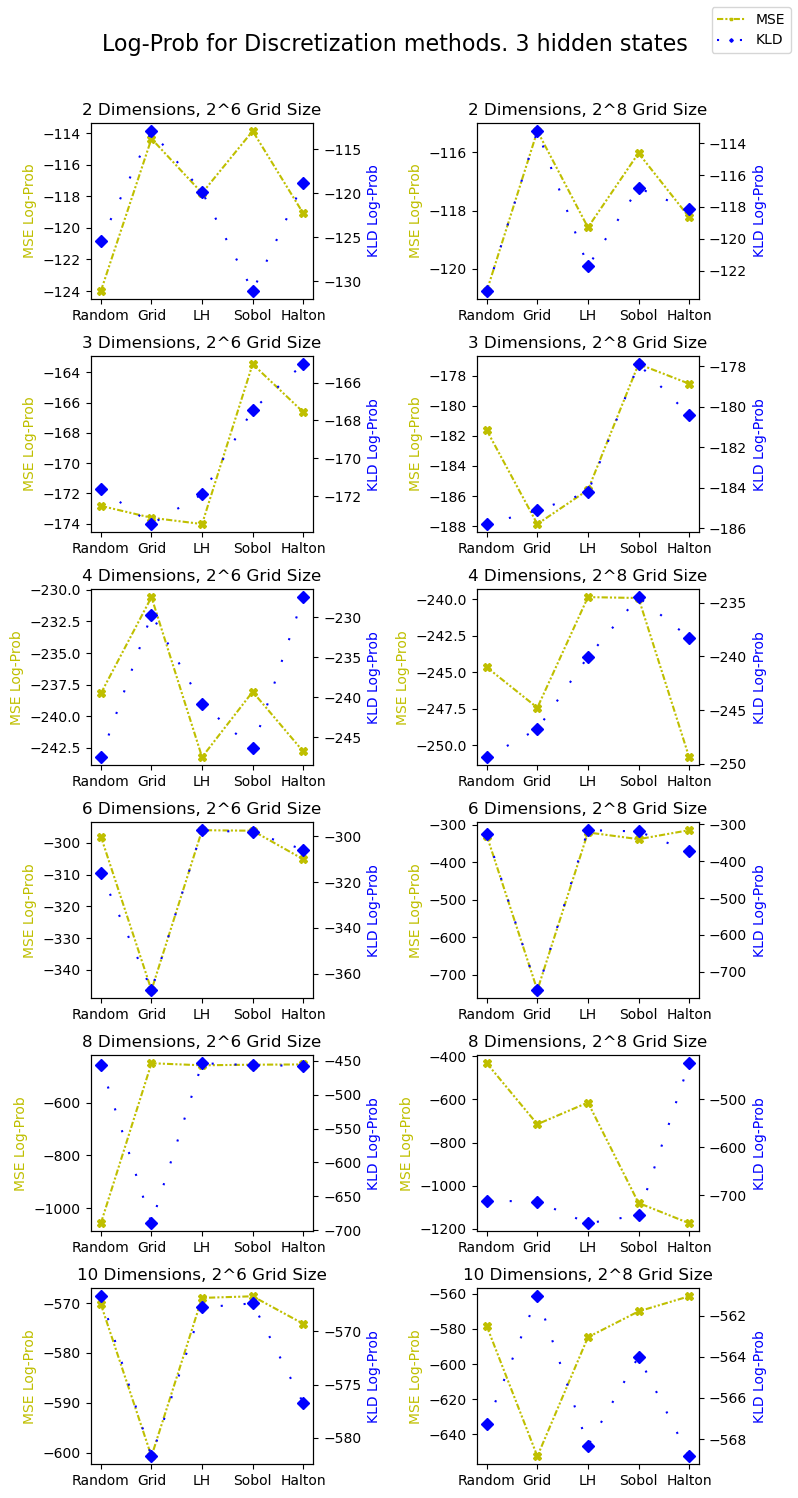

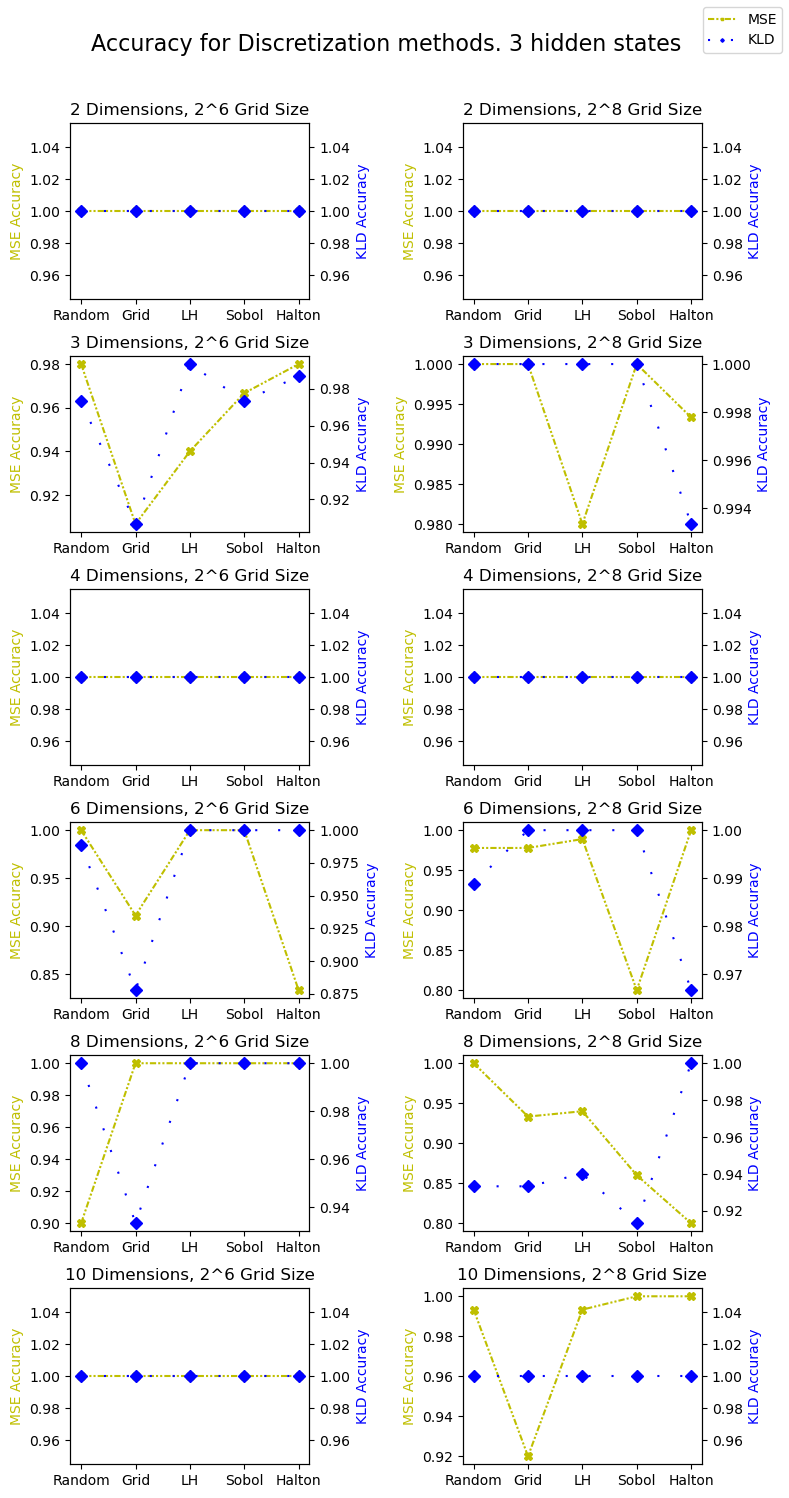

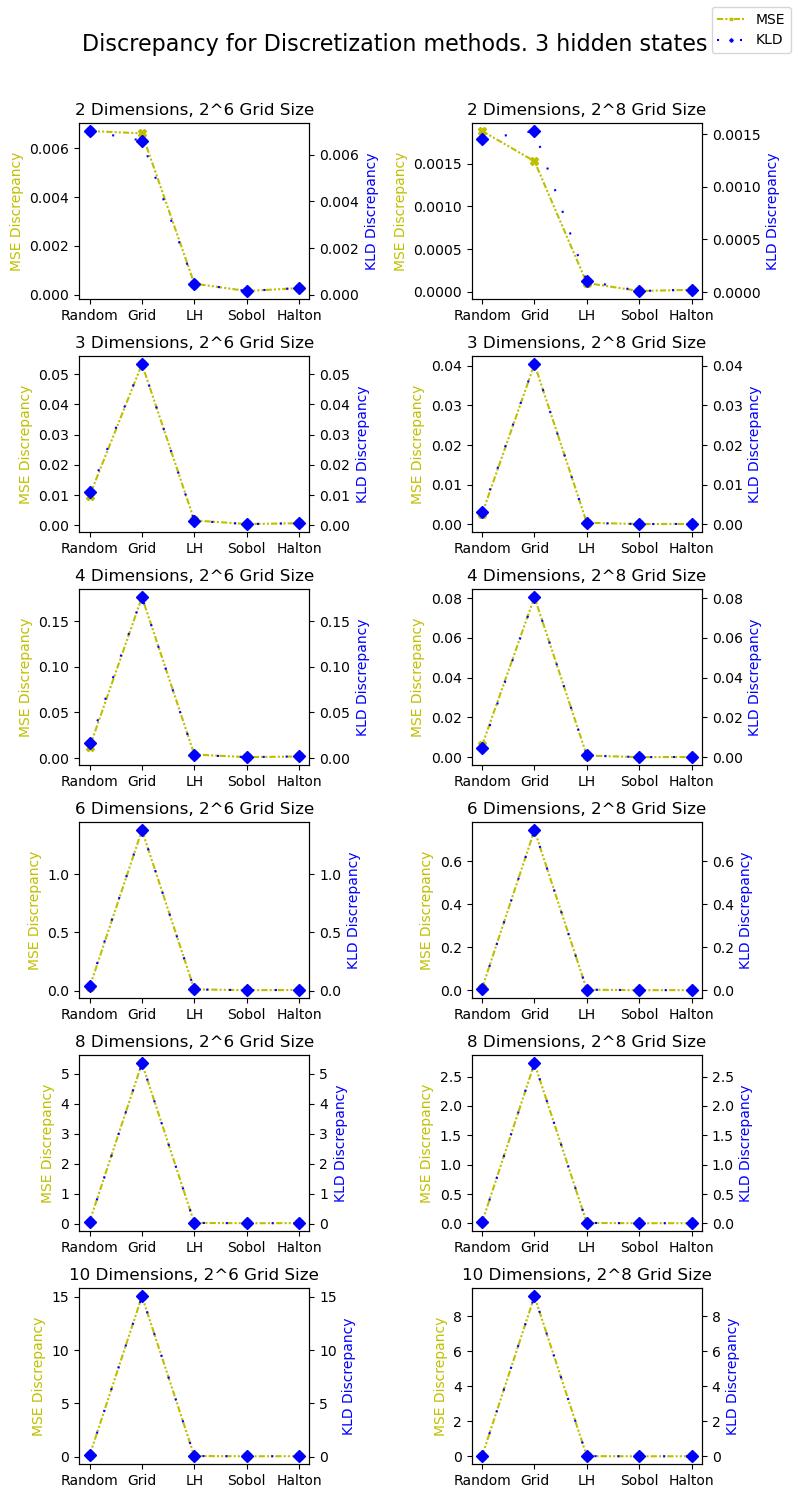

In [21]:
metrics = [df3h_loss, df3h_score, df3h_acc, df3h_discr]
names = ['Loss', 'Log-Prob', 'Accuracy', 'Discrepancy']
for metric, name in zip(metrics, names):
    plotting_results(metric, name, n_hidden=3)